## System Biology Lab

*<u>ODE (Ordinary Differential Equation )</u>*


Ordinary Differential Equation (ODE) can be used to describe a dynamic system.
e.g., the weather outside of the window changes from dawn to dusk, the metabolism occurs in our body is also a dynamic system because thousands of reactions and molecules got synthesized and degraded as time goes.


### Differential equations are solved in Python 

with the *<u>Scipy.integrate</u>* package using function odeint or *solve_ivp*

Another Package is *<u>GEKKO</u>*

### *ODEINT* requires three inputs:
 
 y = odeint(model, y0, t, args)
 
*<u>model</u>*: Function name that returns derivative values at y and t values as *<u>dydt = model(y,t)</u>*
    
*<u>y0</u>*: Initial conditions of the differential states
    
*<u>t</u>*: Time points 
    
*<u>args</u>*: Additional inputs to the model

Let's take a simplest form an differential equation.

In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

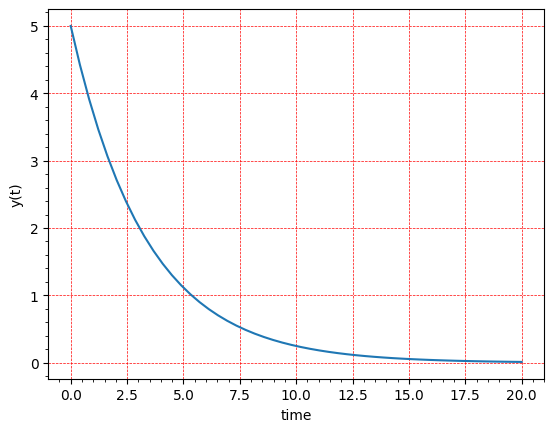

In [15]:
def model(y,t):
    k=0.3
    dydt=-k*y
    return dydt

#initial condition
y0=5

#time points
t=np.linspace(0,20)
# print(t)
y=odeint(model,y0,t)
#plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.minorticks_on()
plt.grid(color='red', linestyle='--', linewidth=0.5)
plt.show()

Q.1. At the start of an experiment there are 100 bacteria. If bacteria follows an *<u>exponential growth*</u> pattern with rate k=0.02, then to find the population after 5 hours and 10 hours.


In [21]:
k=0.02
def f(y,x):
    return k*y
xs=np.arange(0,11,1)
y0=100
ys=odeint(f,y0,xs)
# print(xs)
# print(ys)
for i in xs:
    if i==5 or i==10:
        k=int(i)
        print("The population after " +str(i)+ " hours is " +str(ys[k]))


The population after 5 hours is [110.51709106]
The population after 10 hours is [122.14027497]


Q.2. At the start of an experiment there are 200 bacteria. If bacteria follows an *<u>exponential growth*</u> pattern with rate k=0.01, then to find the population after 20 hours.

The population after 20 hours is [244.28054993]


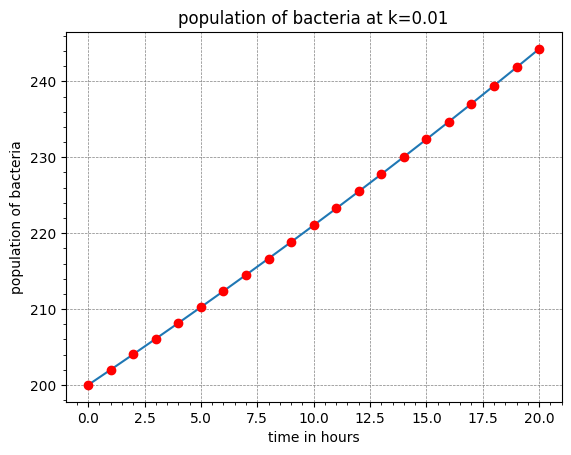

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
k=0.01
def f(y,x):
    return k*y
xs=np.arange(0,21,1)
y0=200
ys=odeint(f,y0,xs)
for i in xs:
    if i==20:
        k=int(i)
        print("The population after " + str(i)+ " hours is " + str(ys[k]))

plt.plot(xs,ys)
plt.plot(xs,ys,'ro')
plt.xlabel('time in hours')
plt.ylabel('population of bacteria')
plt.title('population of bacteria at k=0.01')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

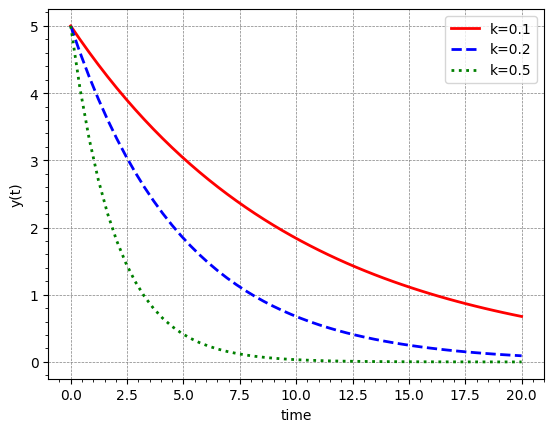

In [23]:
# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

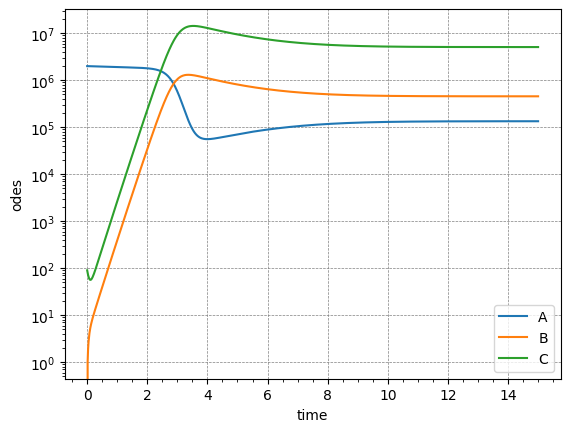

In [29]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def odes(x, t):
    # constants
    a1 = 3e5
    a2 = 0.2
    a3 = 4e-7
    a4 = 0.6
    a5 = 8
    a6 = 90

    # assign each ODE to a vector element
    A = x[0]
    B = x[1]
    C = x[2]

    # define each ODE
    dAdt = a1 - a2*A - a3*A*C
    dBdt = a3*A*C - a4*B
    dCdt = -a3*A*C - a5*C + a6*B

    return [dAdt, dBdt, dCdt]

# initial conditions
x0 = [2e6, 0, 90]

# test the defined odes
# print(odes(x=x0,t=0))

# declare a time vector (time window)
t = np.linspace(0,15,1000)
x = odeint(odes,x0,t)

A = x[:,0]
B = x[:,1]
C = x[:,2]

# plot the results
# Make a plot with log scaling on the y-axis.
plt.semilogy(t,A,label='A')
plt.semilogy(t,B,label='B')
plt.semilogy(t,C,label='C')
plt.xlabel('time')
plt.ylabel('odes')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

Q.3. Solve this ODE with given conditions:
    
consider: u steps 0 to 2 at t=10

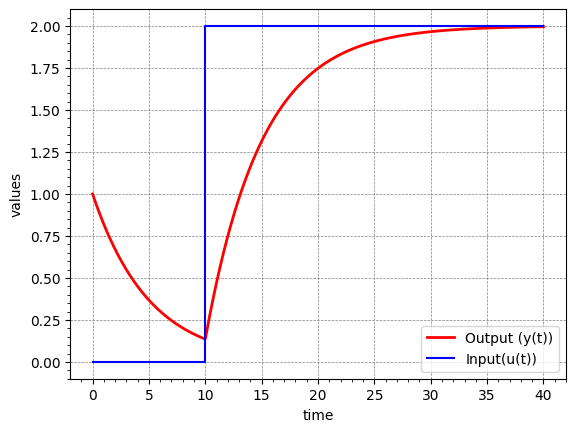

In [42]:
#function that returns dy/dt
def model(y,t):
    #u steps from 0 to 2 at t=10
    if t<10.0:
        u=0
    else:
        u=2
    dydt=(-y+u)/5.0
    return dydt

#initial conditions 
y0=1

#time points
t=np.linspace(0,40,1000)

#solve ODE

y=odeint(model, y0, t)

#plot results
plt.plot(t,y,'r-',linewidth=2,label='Output (y(t))')
plt.plot([0,10,10,40], [0,0,2,2], 'b-', label='Input(u(t))')
plt.xlabel('time')
plt.ylabel('values')
plt.legend(loc='best')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

*<u>SIR model differential equations:</u>* 
The SIR model is a compartmental model that describes the spread of an infectious disease through a population that is divided into three compartments: susceptible (S), infected (I), and recovered (R). The differential equations for the SIR model are:
This equation represents the rate of change of the number of susceptible individuals over time. This is proportional to the product of the transmission rate β, the number of susceptible individuals S, and the number of infected individuals I, divided by the total population size N.

dS/dt = -β * S * I / N

dI/dt = β * S * I / N - γ * I

dR/dt = γ * I

where:

S(t) is the number of susceptible individuals at time t.
I(t) is the number of infected individuals at time t.
R(t) is the number of recovered individuals at time t.
N is the total population size.
β is the transmission rate, which determines the rate at which susceptible individuals become infected.
γ is the recovery rate, which determines the rate at which infected individuals recover and become immune.

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SIR model differential equations
def SIR_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Set the initial conditions and parameters
N = 1000 # Total population
I0 = 1 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
S0 = N - I0 - R0 # Initial number of susceptible individuals
beta = 0.2 # Contact rate
gamma = 1/10 # Recovery rate

# Set the time range (in days)
t = np.linspace(0, 160, 160)

# Integrate the SIR model equations over time
sol = odeint(SIR_model, [S0, I0, R0], t, args=(N, beta, gamma))

# Plot the results
plt.plot(t, sol[:, 0], label='Susceptible')
plt.plot(t, sol[:, 1], label='Infected')
plt.plot(t, sol[:, 2], label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIR Model')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


The above code uses the odeint function from *<u>scipy.integrate*</u> to numerically integrate the SIR model differential equations over time. The *SIR_model* function defines the differential equations, which are passed to odeint along with the initial conditions and parameters. The resulting solution is then plotted using *<u>matplotlib.pyplot*</u>. You can adjust the values of the parameters to simulate different scenarios and explore the behavior of the model.

*<u>SEIR Model:</u>*

This equation represents the rate of change of the number of infected individuals over time. This is equal to the number of individuals who become infected (β * S * I / N) minus the number of individuals who recover (γ * I).
The third equation represents the rate of change of the number of recovered individuals over time. This is proportional to the recovery rate γ and the number of infected individuals I.
The SEIR model is a compartmental model that adds an additional compartment for exposed (E) individuals, who are infected but not yet infectious. The differential equations for the SEIR model are:

dS/dt = -β * S * I / N

dE/dt = β * S * I / N - σ * E

dI/dt = σ * E - γ * I

dR/dt = γ * I

where:
S(t) is the number of susceptible individuals at time t.
E(t) is the number of exposed individuals at time t.
I(t) is the number of infected individuals at time t.
R(t) is the number of recovered individuals at time t.

N is the total population size.
β is the transmission rate, which determines the rate at which susceptible individuals become infected.
σ is the incubation rate, which determines the rate at which exposed individuals become infectious.
γ is the recovery rate, which determines the rate at which infected individuals recover and become immune.

The first equation is the same as in the SIR model.
The second equation represents the rate of change of the number of exposed individuals over time. This is equal to the number of individuals who become exposed (β * S * I / N) minus the number of individuals who become infectious (σ * E).
The third equation is the same as in the SIR model, but the source of new infections is now the number of individuals who become infectious (σ * E) rather than the product of the transmission rate and the numbers of susceptible and infected individuals.
The fourth equation is the same as in the SIR model.


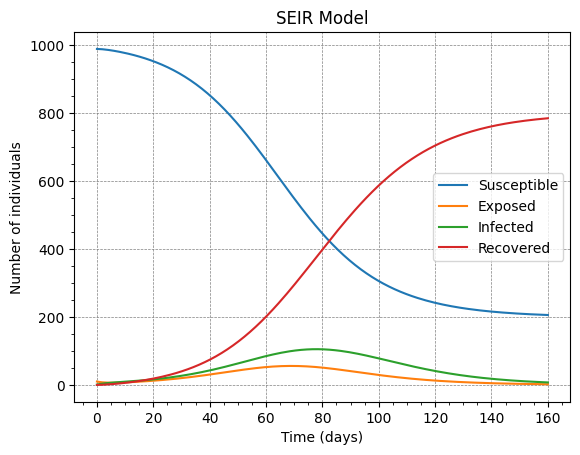

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SEIR model differential equations
def SEIR_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Set the initial conditions and parameters
N = 1000 # Total population
E0 = 10 # Initial number of exposed individuals
I0 = 1 # Initial number of infected individuals
R0 = 0 # Initial number of recovered individuals
S0 = N - E0 - I0 - R0 # Initial number of susceptible individuals
beta = 0.2 # Contact rate
sigma = 1/5 # Incubation rate
gamma = 1/10 # Recovery rate

# Set the time range (in days)
t = np.linspace(0, 160, 160)

# Integrate the SEIR model equations over time
sol = odeint(SEIR_model, [S0, E0, I0, R0], t, args=(N, beta, sigma, gamma))

# Plot the results
plt.plot(t, sol[:, 0], label='Susceptible')
plt.plot(t, sol[:, 1], label='Exposed')
plt.plot(t, sol[:, 2], label='Infected')
plt.plot(t, sol[:, 3], label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SEIR Model')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


**This particular section tries to reproduce figures produced in this article: Sniffers, buzzers, toggles and blinkers: dynamics of regulatory and signaling pathways in the cell. Katherine CC, Novak B, Tyson JJ. Mol Biol Cell, 2003 Apr;15(2):221-31. doi: 10.1016/s0955-0674(03)00017-6.**

The below code provided simulates a linear *<u>signal-response system</u>*. described by a set of differential equations, where the rate of change of the response variable R depends on the signal variable S and the system parameters k0, k1, and k2. The code generates three plots: a solution curve, a rate curve, and a signal-response curve. The solution curve shows how the response variable changes over time for different initial values of R. The rate curve shows the removal and production rates of the response variable as a function of R for different fixed values of the signal variable. The signal-response curve shows the steady-state response of the system as a function of the signal variable. The purpose of this code is to provide insight into the behavior of a linear signal-response system and how it responds to changes in the input signal.


In [6]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from gekko import GEKKO

'''
Figure1A linear signal response
dR/dt = k0 + k1*S - k2*R
'''

def model(R,t,S):
    k0 = 0.01
    k1 = 1
    k2 = 5
    dRdt = k0 + k1*S - k2*R
    return dRdt

R0 = [0,0.3,0.5]
t = np.linspace(0,1,10)
S = 1
result = odeint(model,R0,t,args=(S,))

# solution curve
fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='R0=0')
ax.plot(t,result[:,1],label='R0=0.3')
ax.plot(t,result[:,2],label='R0=0.5')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('R')
ax.axhline(y=0.202,xmin=0,xmax=1,linestyle='--',c='k')
plt.savefig('figure1A_solution_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

# rate curve
k0 = 0.01
k1 = 1
k2 = 5
fig,ax = plt.subplots()
S_options = [1,2,3]
for S in S_options:
    R = np.linspace(0,1,10)
    removal_rate = k2 * R
    production_rate = [k1 * S] * len(R)
    ax.plot(R,removal_rate,linestyle='-',c='k')
    ax.plot(R,production_rate,linestyle='--',c='k')
ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.set_xlabel('R')
ax.set_ylabel('Rate')
plt.savefig('figure1A_rate_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

# signal-response curve
k0 = 0.01
k1 = 1
k2 = 5
S = np.linspace(0,3,7)
R_ss = (k0 + k1*S) / k2
fig,ax = plt.subplots()
ax.plot(S,R_ss,linestyle='-',c='k')
ax.set_xlim(0,3)
ax.set_ylim(0,0.7)
ax.set_xlabel('Signal(S)')
ax.set_ylabel('Response(R)')
plt.savefig('figure1A_SR_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()


Below code is a Python script that generates three figures related to a *<u>nonlinear signal response*</u> system described by the following differential equation:

*dR/dt = k0 + k1S^n / (K^n + S^n) - k2R*

where R = response variable (concentration),
      t = time, 
      S = signal variable (concentration), and 
      k0, k1, k2, n, and K are constants.

The first figure (saved as <u>'figure1B_solution_curve.pdf'</u>) shows the solution curve of the system, which is generated using the 'odeint' function from the 'scipy.integrate' library. The initial conditions for R are given by the list R0, and the time range is specified using the 'linspace' function. The solution curve is plotted for each initial condition in R0, and a horizontal line is added at R=0.202 using the 'axhline' function.

The second figure (saved as <u>'figure1B_rate_curve.pdf'</u>) shows the rate curves of the system. The removal rate (k2R) and the production rate (k1S^n / (K^n + S^n)) are calculated for three different values of S (specified using the 'S_options' list), and plotted against R. The x and y limits of the plot are set using the 'set_xlim' and 'set_ylim' functions, respectively.

The third figure (saved as <u>'figure1B_SR_curve.pdf'</u>) shows the signal-response curve of the system. The steady-state response (R_ss) is calculated for seven different values of S using the equation given above, and plotted against S. The x and y limits of the plot are set using the 'set_xlim' and 'set_ylim' functions, respectively.

Note that the constants k0, k1, k2, n, and K are redefined in each section of the code. This is not necessary, as they could be defined once at the beginning of the script and then used throughout. However, it makes the code easier to understand and modify, as each section can be changed independently without affecting the others.


In [ ]:
'''
Figure1B nonlinear signal response
dR/dt = k0 + k1*S^n / (K^n + S^n) - k2*R
'''

def model(R,t,S):
    k0 = 0.01
    k1 = 1
    k2 = 5
    n = 2
    K = 2
    dRdt = k0 + (k1 * (S**n) / (K**n + S**n)) - k2*R
    return dRdt

R0 = [0,0.3,0.5]
t = np.linspace(0,1,10)
S = 1
result = odeint(model,R0,t,args=(S,))

# solution curve
fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='R0=0')
ax.plot(t,result[:,1],label='R0=0.3')
ax.plot(t,result[:,2],label='R0=0.5')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('R')
ax.axhline(y=0.202,xmin=0,xmax=1,linestyle='--',c='k')
plt.savefig('figure1B_solution_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

# rate curve
k0 = 0.01
k1 = 1
k2 = 5
n = 2
K = 2
fig,ax = plt.subplots()
S_options = [1,2,3]
for S in S_options:
    R = np.linspace(0,1,10)
    removal_rate = k2 * R
    production_rate = [k1 * (S**n) / (K**n + S**n)] * len(R)
    ax.plot(R,removal_rate,linestyle='-',c='k')
    ax.plot(R,production_rate,linestyle='--',c='k')
ax.set_xlim(0,1)
ax.set_ylim(0,6)
ax.set_xlabel('R')
ax.set_ylabel('Rate')
plt.savefig('figure1B_rate_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

# signal-response curve
k0 = 0.01
k1 = 1
k2 = 5
n = 2
K = 2
S = np.linspace(0,3,7)
R_ss = (k0 + (k1 * (S**n) / (K**n + S**n))) / k2
fig,ax = plt.subplots()
ax.plot(S,R_ss,linestyle='-',c='k')
ax.set_xlim(0,3)
ax.set_ylim(0,0.7)
ax.set_xlabel('Signal(S)')
ax.set_ylabel('Response(R)')
plt.savefig('figure1B_SR_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

The below is a Python code that generates plots for two different mathematical models of signal transduction systems.
The first model is a *<u>hyperbolic response model*</u>, which is described by the following ordinary differential equation:
    dRp/dt = k1*S(Rt-Rp) - k2*Rp
    
where Rp is the response variable, t is time, S is the input signal, k1 and k2 are rate constants, and Rt is the total concentration of the response variable. The model assumes that the response of the system is hyperbolic, which means that the response is proportional to the signal at low signal concentrations and saturates at high signal concentrations. The code solves this differential equation using the odeint function from the scipy.integrate module and generates two plots. The first plot shows the solution curve for different initial conditions of Rp, and the second plot shows the signal-response curve, which is the steady-state value of Rp as a function of the signal S.

The second model is a *<u>sigmoidal response model*</u>, which is described by the following differential equation:
    dRp/dt = (k1*S*(Rt-Rp)/(km1+Rt-Rp)) - k2*Rp/(km2+Rp)

where km1 and km2 are the Michaelis-Menten constants for the production and removal of Rp, respectively. This model assumes that the response of the system is sigmoidal, which means that the response is low at low signal concentrations, increases rapidly at intermediate signal concentrations, and saturates at high signal concentrations. The code solves this differential equation using the odeint function and generates three plots. The first plot shows the solution curve for different initial conditions of Rp, the second plot shows the rate curves for different values of S, which are the production and removal rates of Rp as a function of Rp, and the third plot shows the signal-response curve, which is the steady-state value of Rp as a function of the signal S.


In [8]:

'''
Figure1B, hyperbolic response
dRp/dt = k1*S(Rt-Rp) - k2*Rp
'''

def model(y,t,S):
    k1 = 1
    k2 = 1
    Rt = 1
    dydt = k1*S*(Rt-y) - k2*y
    return dydt

S = 1
Rp0 = [0,0.5,1]
t = np.linspace(0,1,10)
result = odeint(model,Rp0,t,args=(S,))


# solution curve
fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='R0=0')
ax.plot(t,result[:,1],label='R0=0.5')
ax.plot(t,result[:,2],label='R0=1')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('Rp')
ax.axhline(y=0.5,xmin=0,xmax=1,linestyle='--',c='k')
plt.savefig('figure1B_solution_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

# signal-response curve
k1 = 1
k2 = 1
Rt = 1
S = np.linspace(0,10,100)
Rp_ss = (S * Rt) / (k2/k1 + S)
fig,ax = plt.subplots()
ax.plot(S,Rp_ss,linestyle='-',c='k')
ax.set_xlim(0,10)
ax.set_ylim(0,1.1)
ax.set_xlabel('Signal(S)')
ax.set_ylabel('Response(R)')
plt.savefig('figure1B_SR_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

'''
sigmoidal curve
dRp/dt = (k1*S*(Rt-Rp)/(km1+Rt-Rp)) - k2*Rp/(km2+Rp)
'''

def model(Rp,t,S):
    k1 = 1
    k2 = 1
    Rt = 1
    km1 = 0.05
    km2 = 0.05
    dRpdt = (k1*S*(Rt-Rp)/(km1+Rt-Rp)) - k2*Rp/(km2+Rp)
    return dRpdt

S = 1
Rp0 = [0,0.3,1]
t = np.linspace(0,20,200)
result = odeint(model,Rp0,t,args=(S,))

# solution curve
fig,ax = plt.subplots()
ax.plot(t,result[:,0],label='R0=0')
ax.plot(t,result[:,1],label='R0=0.3')
ax.plot(t,result[:,2],label='R0=1')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('Rp')
plt.savefig('figure1C_solution_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()


# rate curve
k1 = 1
k2 = 1
Rt = 1
km1 = 0.05
km2 = 0.05
Rp = np.linspace(0,1,100)
fig,ax = plt.subplots()
for S in [0.25,0.5,1,1.5,2]:
    removal_rate = k2*Rp/(km2+Rp)
    production_rate = k1*S*(Rt-Rp)/(km1+Rt-Rp)
    ax.plot(Rp,removal_rate,linestyle='-',c='k')
    ax.plot(Rp,production_rate,linestyle='--',c='k')
ax.set_xlim(0,1)
ax.set_xlabel('Rp')
ax.set_ylim(0,2)
ax.set_ylabel('Rate')
plt.savefig('figure1C_rate_curve.pdf',bbox_inches='tight')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.close()

# signal-response curve
S_all = np.linspace(0,3,100)
def equation(Rp,S):
    k1 = 1
    k2 = 1
    Rt = 1
    km1 = 0.05
    km2 = 0.05
    return k1*S*(Rt-Rp)/(km1+Rt-Rp) - k2*Rp/(km2+Rp)

from scipy.optimize import fsolve
store = []
for S in S_all:
    Rp_ss = fsolve(equation,[1],args=(S,))[0]
    store.append(Rp_ss)

fig,ax = plt.subplots()
ax.plot(S_all,store,c='k')
ax.set_xlim(0,3)
ax.set_xlabel('Signal(S)')
ax.set_ylim(0,1.1)
ax.set_ylabel('Response(R_ss)')
plt.minorticks_on();plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('figure1C_SR_curve.pdf',bbox_inches='tight')
plt.close()

References:
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
    
https://github.com/APMonitor/pdc/blob/master/Solve_ODEs_with_scipy.ipynb
    
https://towardsdatascience.com/ordinal-differential-equation-ode-in-python-8dc1de21323b
    
*Sniffers, buzzers, toggles and blinkers: dynamics of regulatory and signaling pathways in the cell.* Katherine CC, Novak B, Tyson JJ. Mol Biol Cell, 2003 Apr;15(2):221-31. doi: 10.1016/s0955-0674(03)00017-6.